In [63]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# EDA

In [74]:
data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
data.describe()

id  song_duration_ms  acousticness  danceability       energy  \
count  10000.00000       9043.000000   9050.000000   9024.000000  8945.000000   
mean    4999.50000     193091.108813      0.280280      0.569817     0.683552   
std     2886.89568      46502.319884      0.299971      0.190177     0.212561   
min        0.00000      25377.000000     -0.013585      0.064548     0.020959   
25%     2499.75000     166689.000000      0.042181      0.426734     0.541975   
50%     4999.50000     186196.000000      0.141564      0.605759     0.700278   
75%     7499.25000     215059.000000      0.493003      0.715491     0.870670   
max     9999.00000     448558.000000      1.046311      0.946831     1.031383   

       instrumentalness          key     liveness     loudness    audio_mode  \
count       9000.000000  9008.000000  8994.000000  8974.000000  10000.000000   
mean           0.036588     5.012544     0.196379    -7.422145      0.323800   
std            0.151470     3.387481     0.149440     3.902743      0.467948   
min           -0.003344     0.000000     0.034516   -29.887298      0.000000   
25%            0.000930     2.000000     0.111599    -9.654517      0.000000   
50%            0.001964     5.000000     0.135997    -6.346205      0.000000   
75%            0.003165     8.000000     0.208563    -4.605297      1.000000   
max            1.020970    11.000000     1.003777    -0.879306      1.000000   

        speechiness         tempo  time_signature  audio_valence  
count  10000.000000  10000.000000    10000.000000   10000.000000  
mean       0.094242    116.460635        3.391800       0.576109  
std        0.084294     26.320082        0.529075       0.236501  
min        0.017554     60.702888        2.000000       0.017450  
25%        0.038282     96.951325        3.000000       0.395860  
50%        0.055208    113.258381        3.000000       0.588477  
75%        0.118976    128.020862        4.000000       0.755265  
max        0.526199    213.922252        5.000000       1.013865

In [75]:
data.head()


id  song_duration_ms  acousticness  danceability    energy  \
0   0          308523.0      0.019845           NaN  0.908939   
1   1          200011.0      0.070119      0.731256  0.444655   
2   2          279758.0      0.810637      0.568858  0.125466   
3   3          249197.0           NaN      0.871789  0.557342   
4   4               NaN      0.765568      0.624687  0.710794   

   instrumentalness   key  liveness   loudness  audio_mode  speechiness  \
0          0.001438   NaN  0.112832  -8.890172           0     0.082714   
1          0.002020  10.0  0.139040  -6.301214           0     0.061685   
2          0.898841   0.0  0.226614 -11.542478           0     0.041868   
3          0.000715   4.0  0.325391  -7.905546           1     0.046815   
4          0.000346   8.0  0.308284        NaN           0     0.129284   

        tempo  time_signature  audio_valence  
0  126.129304               4       0.399620  
1   86.448149               3       0.499424  
2   99.544351               3       0.564951  
3  123.063854               4       0.906485  
4   88.703121               3       0.935571

In [76]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   song_duration_ms  9043 non-null   float64
 2   acousticness      9050 non-null   float64
 3   danceability      9024 non-null   float64
 4   energy            8945 non-null   float64
 5   instrumentalness  9000 non-null   float64
 6   key               9008 non-null   float64
 7   liveness          8994 non-null   float64
 8   loudness          8974 non-null   float64
 9   audio_mode        10000 non-null  int64  
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  time_signature    10000 non-null  int64  
 13  audio_valence     10000 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.1 MB


In [77]:
data.isna().sum()

id                     0
song_duration_ms     957
acousticness         950
danceability         976
energy              1055
instrumentalness    1000
key                  992
liveness            1006
loudness            1026
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
dtype: int64

In [68]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile.to_file('EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
data.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

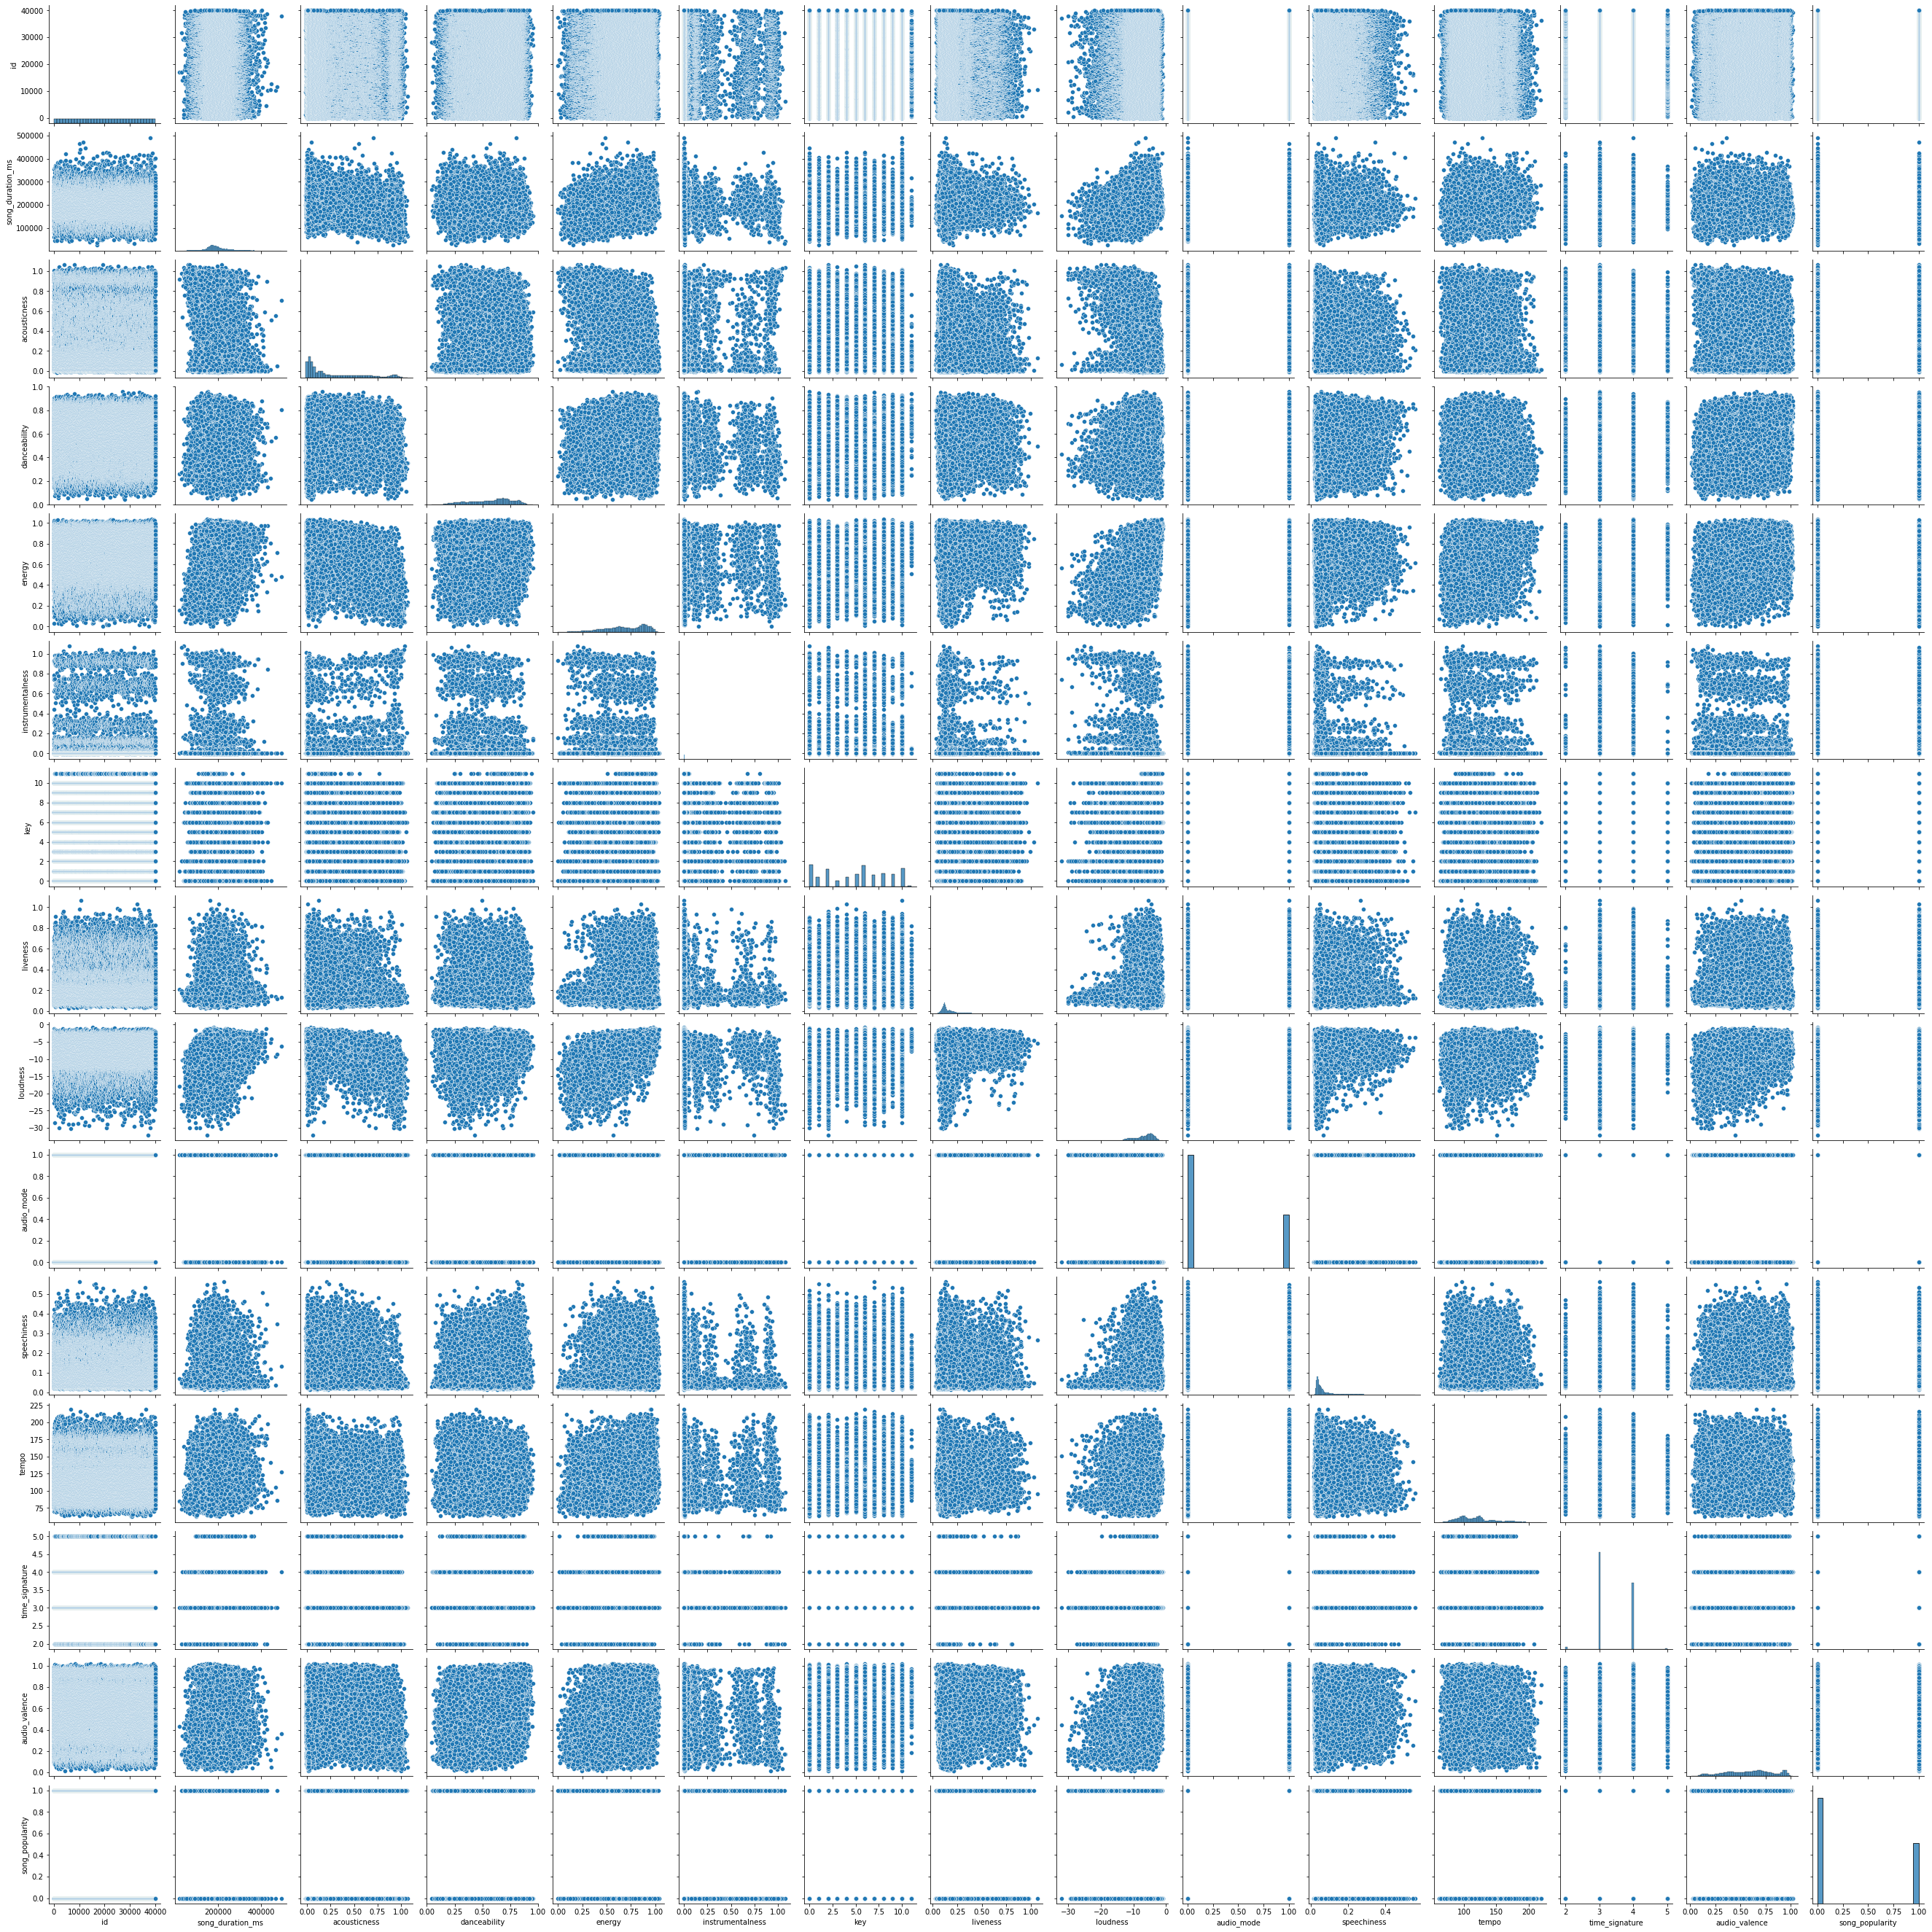

In [70]:
sns.pairplot(data)
plt.show()

# Data Transformation

In [78]:
cols = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']
X = data[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]
Y = data['song_popularity']

na_cols = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness']
X_test = test_data[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]



In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(fill_value=np.nan, strategy='median').fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X, columns=cols)

X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

scaler = MinMaxScaler().fit(X) 
X = scaler.transform(X)
X = pd.DataFrame(X, columns=cols)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)


song_duration_ms  acousticness  danceability    energy  \
0             0.606990      0.030956      0.617928  0.874400   
1             0.374138      0.077556      0.752648  0.428584   
2             0.545264      0.763961      0.574808  0.122091   
3             0.479684      0.142824      0.906544  0.536789   
4             0.345488      0.722185      0.635946  0.684137   
...                ...           ...           ...       ...   
9995          0.365968      0.090363      0.853391  0.426271   
9996          0.413476      0.110147      0.700617  0.816487   
9997          0.349295      0.710974      0.810349  0.480057   
9998          0.316270      0.813034      0.360637  0.458818   
9999          0.283765      0.030963      0.740738  0.678048   

      instrumentalness       key  liveness  loudness  audio_mode  speechiness  \
0             0.005405  0.454545  0.081921  0.743512         0.0     0.123972   
1             0.005943  0.909091  0.107182  0.826384         0.0     0.085435   
2             0.836477  0.000000  0.191595  0.658613         0.0     0.049120   
3             0.004735  0.363636  0.286805  0.775030         1.0     0.058185   
4             0.004394  0.727273  0.270316  0.824969         0.0     0.209315   
...                ...       ...       ...       ...         ...          ...   
9995          0.006842  0.090909  0.092609  0.750169         1.0     0.047841   
9996          0.005842  0.545455  0.075838  0.869756         0.0     0.033977   
9997          0.128193  0.545455  0.058127  0.649966         1.0     0.026502   
9998          0.004118  0.909091  0.090875  0.632085         0.0     0.321731   
9999          0.039011  0.181818  0.107551  0.869146         1.0     0.069989   

         tempo  time_signature  audio_valence  
0     0.407832        0.666667       0.382717  
1     0.155259        0.333333       0.481615  
2     0.238617        0.333333       0.546547  
3     0.388320        0.666667       0.884981  
4     0.169612        0.333333       0.913803  
...        ...             ...            ...  
9995  0.230471        0.666667       0.763710  
9996  0.266657        0.666667       0.829756  
9997  0.363030        0.666667       0.465301  
9998  0.260920        0.333333       0.500757  
9999  0.304363        0.666667       0.949275  

[10000 rows x 13 columns]

# Saving Data

In [80]:
data = X
data['song_popularity'] = Y
data.to_csv('../data/train-transform.csv', index=False)

X_test.to_csv('../data/test-transform.csv', index=False)

